# General EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# make pandas show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formating the plots
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['figure.figsize'] = (15, 5)
m.rcParams['font.size'] = 12
m.rcParams['legend.fontsize'] = 'large'
m.rcParams['figure.titlesize'] = 'medium'
m.rcParams['text.color'] = 'k'
sns.set(rc={'figure.figsize':(15,5)})

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Forest Cover Type Prediction -- Jessica Cabral" --iversions
%watermark -n -t -z

numpy      1.19.1
matplotlib 3.2.2
pandas     1.1.0
seaborn    0.10.1
Forest Cover Type Prediction -- Jessica Cabral
Wed Aug 19 2020 19:15:21 Hora oficial do Brasil


In [3]:
np.random.seed(42)
random.seed(42)

## Read Data

In [4]:
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')
sample_submission = pd.read_csv('../../data/sampleSubmission.csv')

print('Train: {}'.format(train.shape))
print('test: {}'.format(test.shape))
print('sample_submission: {}'.format(sample_submission.shape))

Train: (15120, 56)
test: (565892, 55)
sample_submission: (565892, 2)


In [5]:
display(train.head(), test.head())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Basic Statistics

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [7]:
train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

Let`s see if all the Soil Types are present in our data

In [9]:
print('There are a total of {} Soil Types in our train data'.format(len(set(train.columns[15:-1]))))

print('\nIs there any not present?')
st_not_present = []
for c in train[train.columns[15:-1]].columns:
    a = train[c].value_counts()
    if len(a.index) < 2:
        display(a)
        st_not_present.append(c)
        print()

print('Soil types {} are not present in any data'.format(st_not_present))

There are a total of 40 Soil Types in our train data

Is there any not present?


0    15120
Name: Soil_Type7, dtype: int64

0    15120
Name: Soil_Type15, dtype: int64


Soil types ['Soil_Type7', 'Soil_Type15'] are not present in any data


Let's do the same thing for Wild Areas

In [10]:
print('There are a total of {} Wild Areas in our train data'.format(len(set(train.columns[11:15]))))

print('\nIs there any not present?')
st_not_present = []
for c in train[train.columns[11:15]].columns:
    a = train[c].value_counts()
    if len(a.index) < 2:
        display(a)
        st_not_present.append(c)
        print()

print('Soil types {} are not present in any data'.format(st_not_present))

There are a total of 4 Wild Areas in our train data

Is there any not present?
Soil types [] are not present in any data


So all Wild Areas have at least one point in the data...cool

## Basic Pre-Procecessing

We will do some basic pre processing just to help us visualize better our data

In [11]:
# Lets replace the foresteric values back to their original values for better analysis


# Original values for Cover Type feature can be found here: https://www.kaggle.com/c/forest-cover-type-prediction/data
cover_type_original_values = {1:'Spruce/Fir', 
                   2:'Lodgepole Pine', 
                   3:'Ponderosa Pine', 
                   4:'Cottonwood/Willow', 
                   5:'Aspen', 
                   6:'Douglas-fir', 
                   7:'Krummholz'
}

train['Cover_Type'] = train['Cover_Type'].replace(cover_type_original_values)

In [12]:
cols_original_values = {"Wilderness_Area1":"Rawah_WA",
                        "Wilderness_Area2":"Neota_WA",
                        "Wilderness_Area3":"Comanche_Peak_WA",
                        "Wilderness_Area4":"Cache_la_Poudre_WA",
                        "Horizontal_Distance_To_Hydrology":"HD_Hydrology",
                        "Vertical_Distance_To_Hydrology":"VD_Hydrology",
                        "Horizontal_Distance_To_Roadways":"HD_Roadways",
                        "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"}

train = train.rename(columns=cols_original_values)

In [13]:
# Here I have converted the encoded values for columns Wilderness_Areas and Soil_types back to a single column for better analysis.

train['Wild_Areas'] = (train.iloc[:,11:15] == 1).idxmax(1)
train['Soil_Types'] = (train.iloc[:,15:55] == 1).idxmax(1)

#Drop the columns which are not required now
train = train.drop(columns=["Id",'Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])


# Let's replace it with some short name Which will help us in visualizations
train['Soil_Types'] = train['Soil_Types'].str.replace('Soil_Type',"ST")

In [14]:
# Lets convert all the columns names to lower case and remove white spaces
train.columns= train.columns.str.strip().str.lower()

In [15]:
# Lets see the results
train.head()

,elevation,aspect,slope,hd_hydrology,vd_hydrology,hd_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,hd_fire_points,cover_type,wild_areas,soil_types
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,ST29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,ST29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,ST12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,ST30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,ST29


## EDA

#### Cover Type

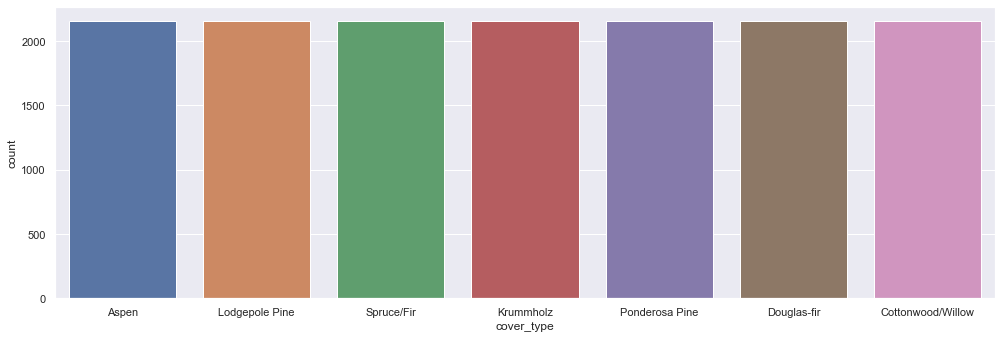

In [16]:
# Cover Type feature consists of seven forest cover types
sns.countplot(train.cover_type)
plt.show()

All Cover Types have the same distribution

Let's see the others features

#### Wilderness Areas

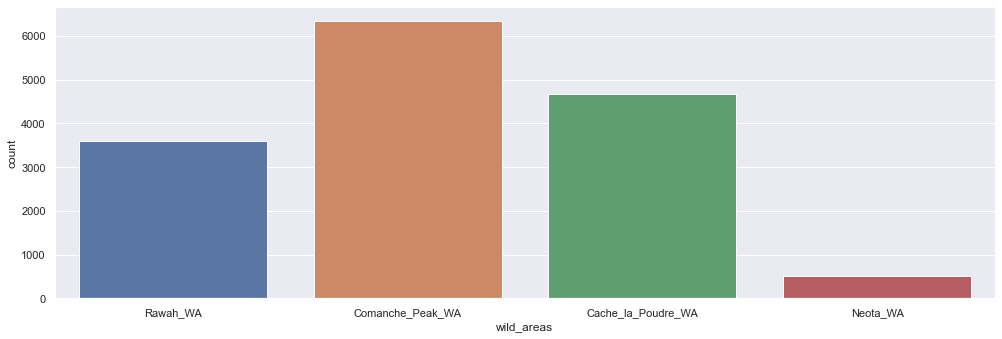

In [17]:
# We have 4 wilderness areas located in the Roosevelt National Forest of northern Colorado
sns.countplot(train.wild_areas)
plt.show()

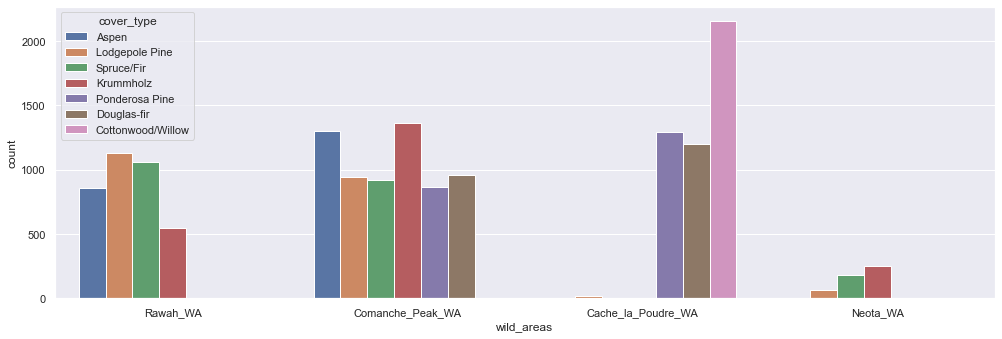

In [18]:
sns.countplot('wild_areas', hue='cover_type', data=train)
plt.show()

In [19]:
# Percentage representation for each wild area in the dataset
train.wild_areas.value_counts(normalize=True)*100

Comanche_Peak_WA      41.990741
Cache_la_Poudre_WA    30.919312
Rawah_WA              23.789683
Neota_WA               3.300265
Name: wild_areas, dtype: float64

- We can see that none of the wild areas have all the types of forest covers
- The Least is Neota Wild Area with only 3.3% in our data
- Comanche_Peak_WA and Neota_WA have only 3 wild areas each
- Comanche_Peak_WA by itself has 42% of the total wild areas

#### Soil Types

There are a total of 38 Soil Types in our train data


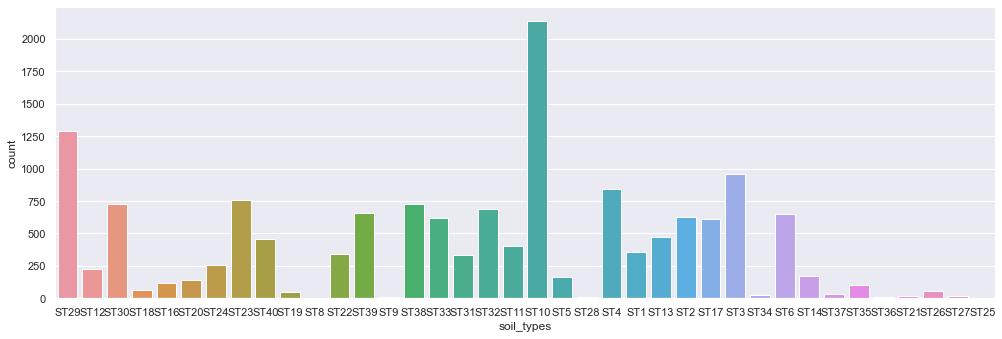

In [20]:
print('There are a total of {} Soil Types in our train data'.format(len(set(train.soil_types))))

sns.countplot('soil_types', data=train)
plt.show()

In [21]:
# Percentage representation for each soil types in the dataset
train.soil_types.value_counts(normalize=True)*100

ST10    14.166667
ST29     8.538360
ST3      6.362434
ST4      5.575397
ST23     5.006614
ST38     4.814815
ST30     4.794974
ST32     4.563492
ST39     4.345238
ST6      4.298942
ST2      4.120370
ST33     4.074074
ST17     4.047619
ST13     3.148148
ST40     3.035714
ST11     2.685185
ST1      2.347884
ST22     2.281746
ST31     2.195767
ST24     1.699735
ST12     1.501323
ST14     1.117725
ST5      1.091270
ST20     0.919312
ST16     0.753968
ST35     0.674603
ST18     0.396825
ST26     0.357143
ST19     0.304233
ST37     0.224868
ST34     0.145503
ST21     0.105820
ST27     0.099206
ST9      0.066138
ST36     0.066138
ST28     0.059524
ST8      0.006614
ST25     0.006614
Name: soil_types, dtype: float64

- Soil Type 10 and 29 are the most frequent in our data
- We have a lot of rare soil types in our data

#### Soil Types in each Wild Area.

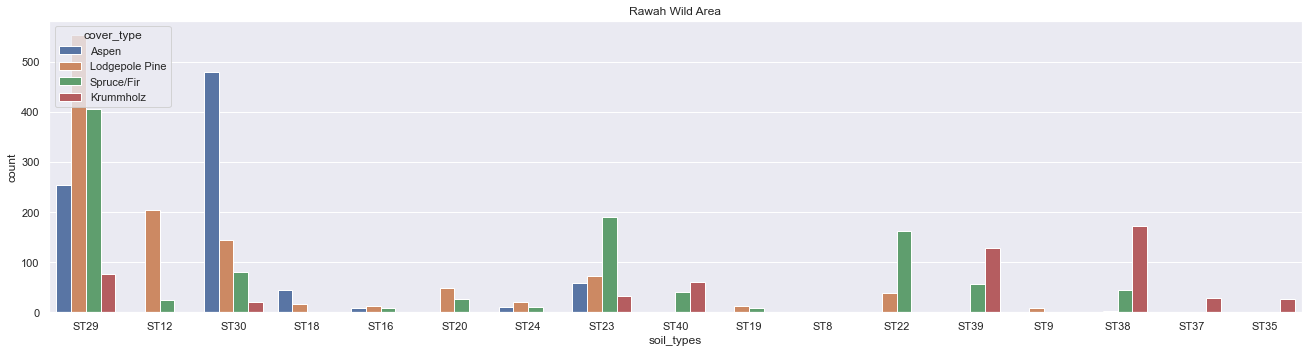

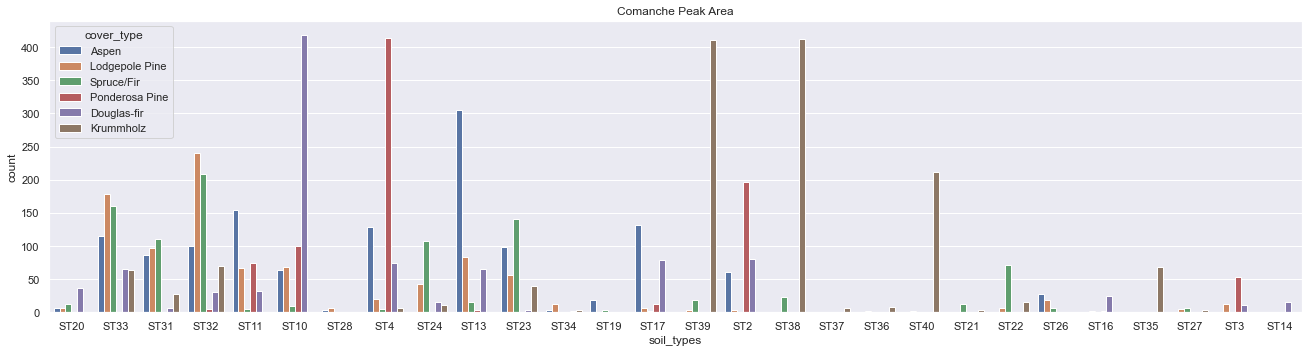

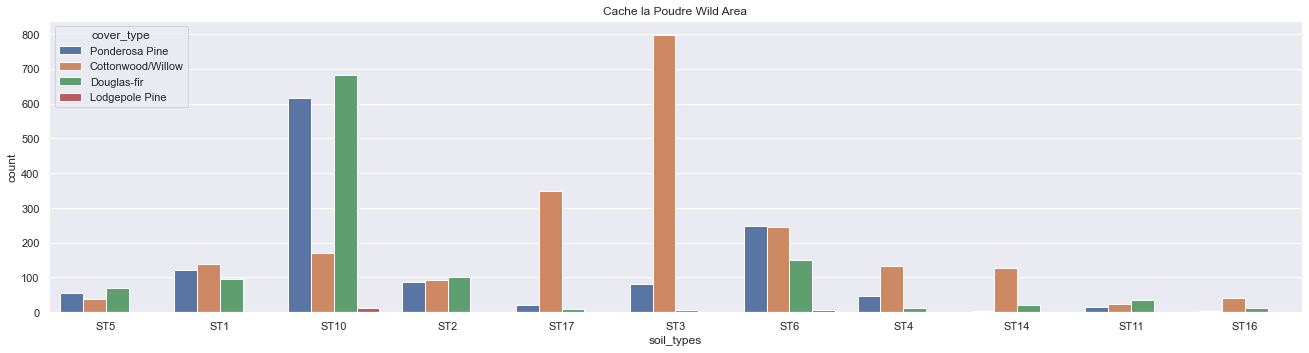

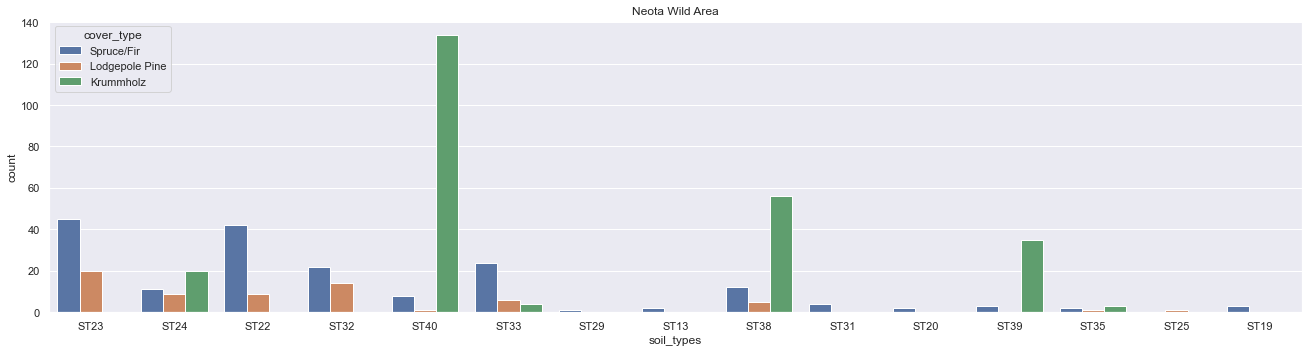

In [22]:
plt.figure(figsize=(20,5))
temp = train[train['wild_areas']=="Rawah_WA"][['wild_areas','soil_types',"cover_type"]]
fig = sns.countplot("soil_types", hue="cover_type",data=temp)
fig.set_title("Rawah Wild Area")
plt.show()

plt.figure(figsize=(20,5))
temp = train[train['wild_areas']=="Comanche_Peak_WA"][['wild_areas','soil_types',"cover_type"]]
fig = sns.countplot("soil_types",hue="cover_type", data=temp)
fig.set_title("Comanche Peak Area" )
plt.show()

plt.figure(figsize=(20,5))
temp = train[train['wild_areas']=="Cache_la_Poudre_WA"][['wild_areas','soil_types',"cover_type"]]
fig = sns.countplot("soil_types",hue="cover_type",data=temp)
fig.set_title("Cache la Poudre Wild Area")
plt.show()

plt.figure(figsize=(20,5))
temp = train[train['wild_areas']=="Neota_WA"][['wild_areas','soil_types',"cover_type"]]
fig = sns.countplot("soil_types",hue="cover_type", data=temp)
fig.set_title("Neota Wild Area")
plt.show()

del temp

Looks like the Comanche Peak Area have the most diversity of Soil Types of all

#### Elevation

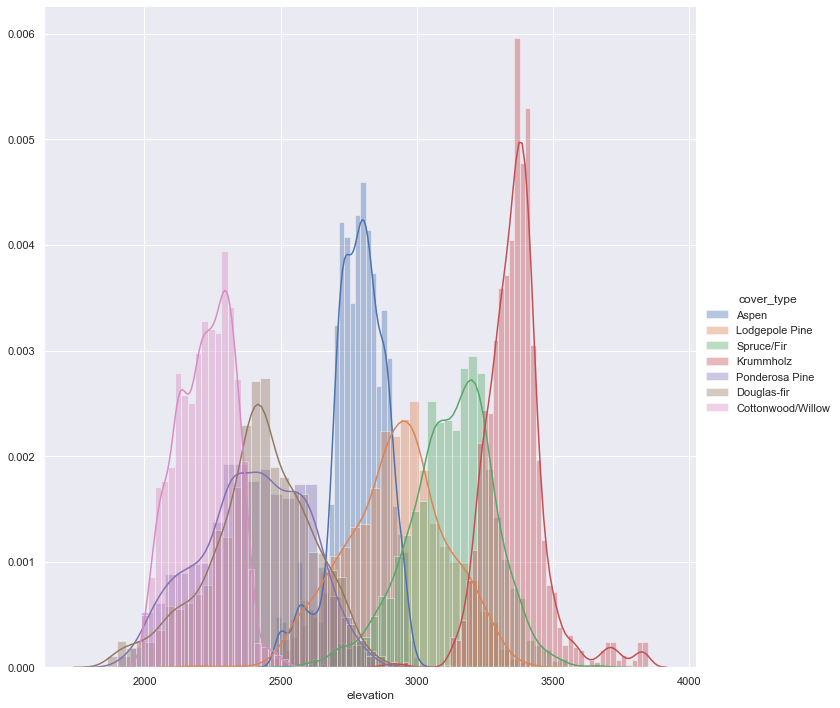

In [23]:
g = sns.FacetGrid(train, hue="cover_type",  height= 10)
g = g.map(sns.distplot, "elevation") .add_legend()

plt.show()

- All the Forest cover types are highly distributed. 
- Krummholz and Spruce grow at a higher elevated regions
- Cottonwood type grow at a lower elevated regions
- Lodgepole and Aspen seems to grow in the "medium" elevation

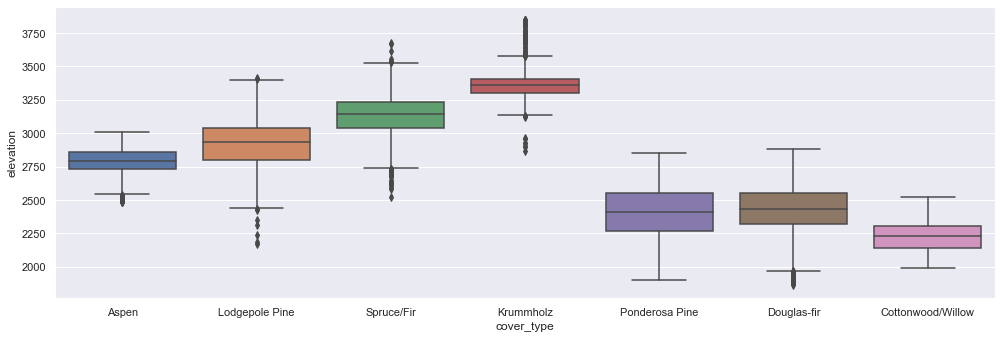

In [24]:
sns.boxplot(x="cover_type", y="elevation", data=train)

In [25]:
train.groupby('cover_type').elevation.describe().style.background_gradient(cmap="Reds")

,count,mean,std,min,25%,50%,75%,max
cover_type,,,,,,,,
Aspen,2160.000000,2786.801389,96.177469,2482.000000,2729.000000,2793.000000,2856.000000,3007.000000
Cottonwood/Willow,2160.000000,2223.420370,102.929940,1989.000000,2140.000000,2230.500000,2304.250000,2526.000000
Douglas-fir,2160.000000,2423.276852,188.966981,1863.000000,2319.750000,2430.000000,2553.000000,2883.000000
Krummholz,2160.000000,3362.769907,109.126811,2870.000000,3299.000000,3364.000000,3410.000000,3849.000000
Lodgepole Pine,2160.000000,2922.540278,185.778268,2169.000000,2802.000000,2931.500000,3042.000000,3413.000000
Ponderosa Pine,2160.000000,2398.423148,194.108147,1903.000000,2270.000000,2409.000000,2551.000000,2850.000000
Spruce/Fir,2160.000000,3128.025926,156.124988,2525.000000,3036.000000,3144.000000,3234.000000,3675.000000


Elevation for each forest cover in each wild area

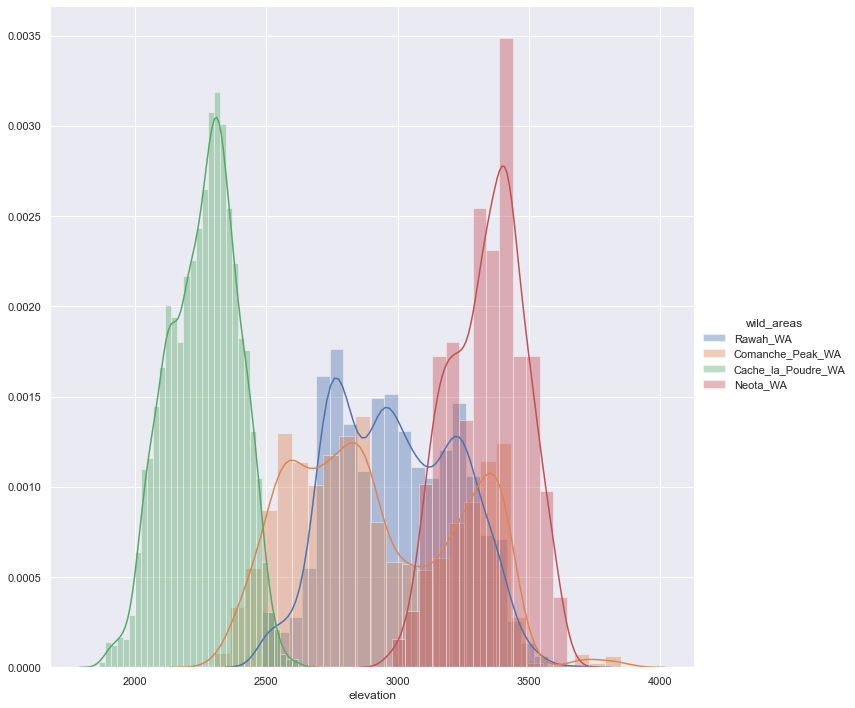

In [26]:
g = sns.FacetGrid(train, hue="wild_areas",  height= 10)
g = g.map(sns.distplot, "elevation") .add_legend()
plt.show()

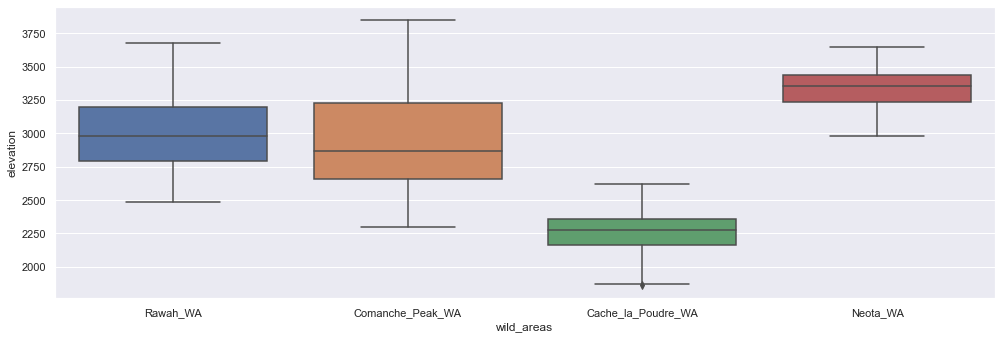

In [27]:
sns.boxplot(x="wild_areas", y="elevation", data=train)

#### Aspect

#### Slope

#### Horizontal Distance to Hydrology

#### Vertical Distance to Hydrology

#### Horizontal Distance to Roadways

#### Horizontal distance to fire points

#### Hillshade at 9am

#### Hillshade at Noon

#### Hillshade at 3pm

#### Hitogram of all numerical features

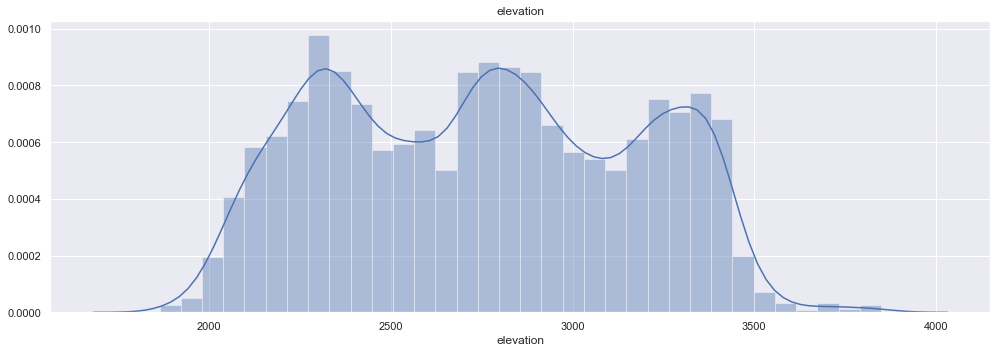

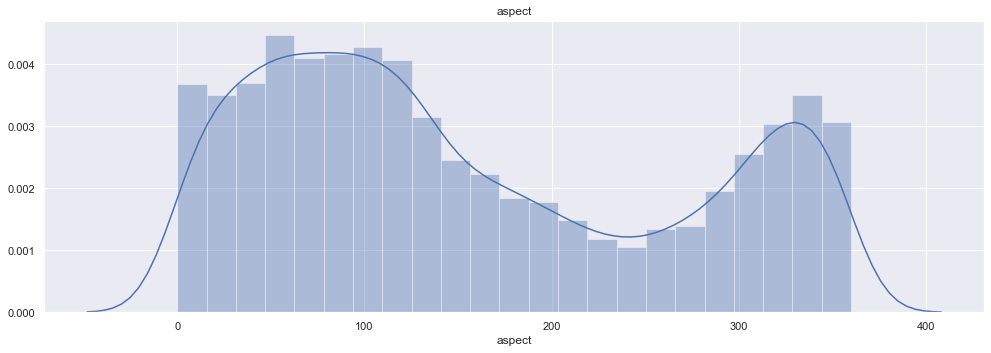

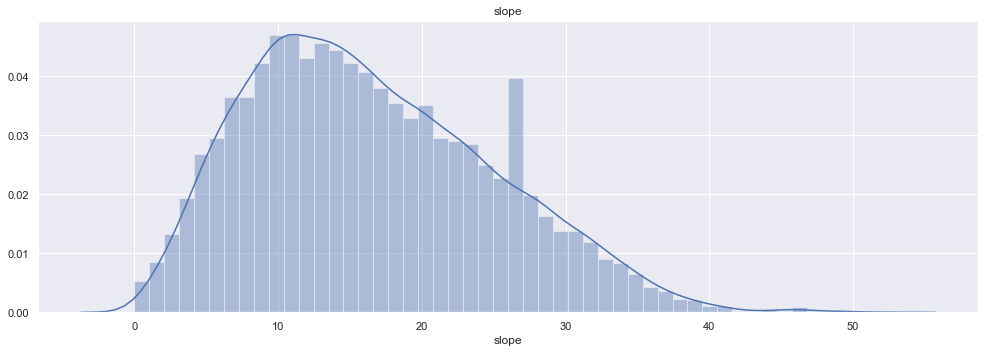

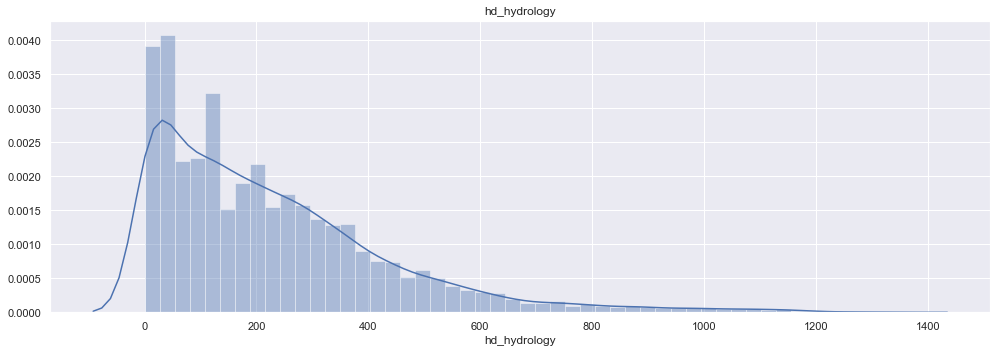

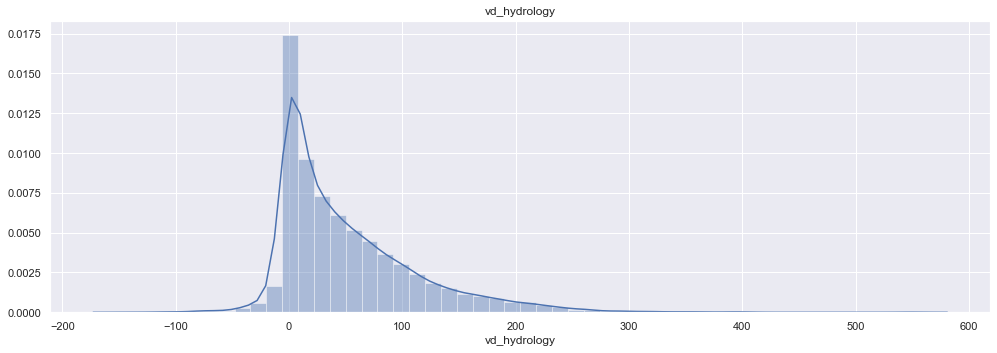

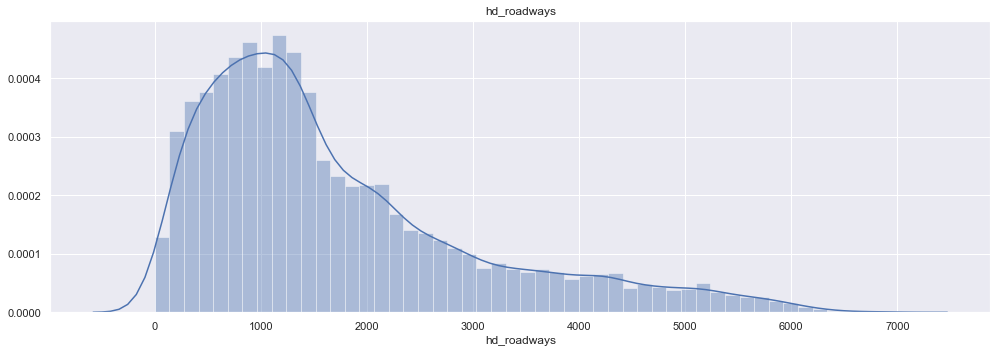

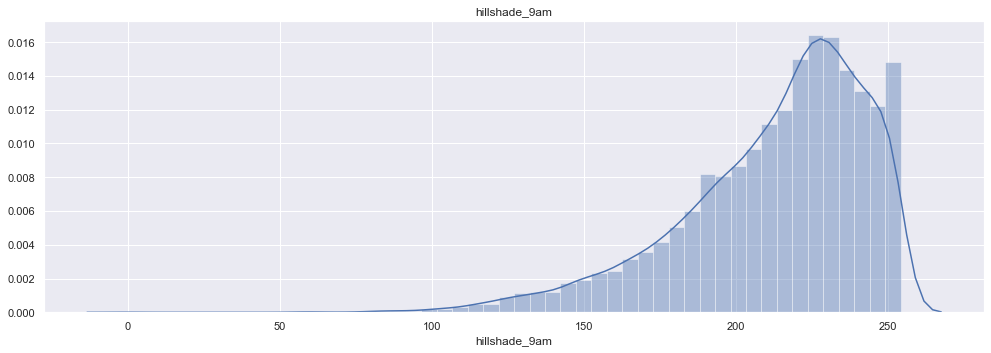

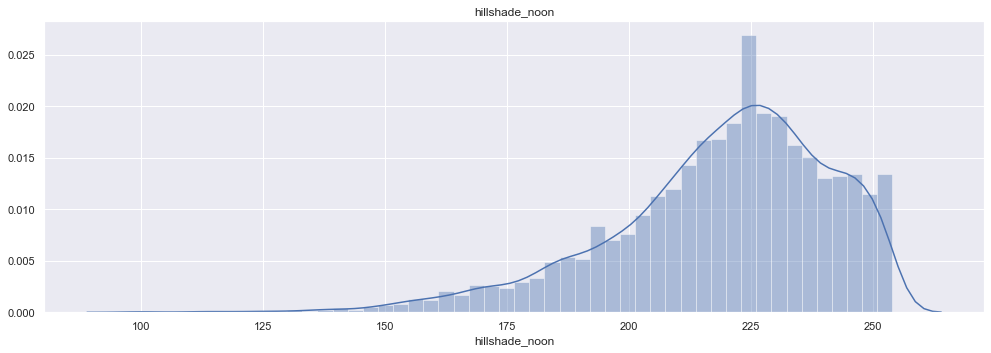

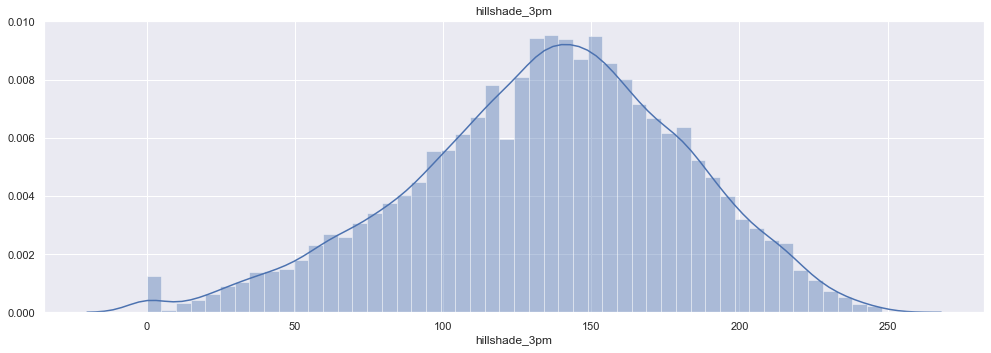

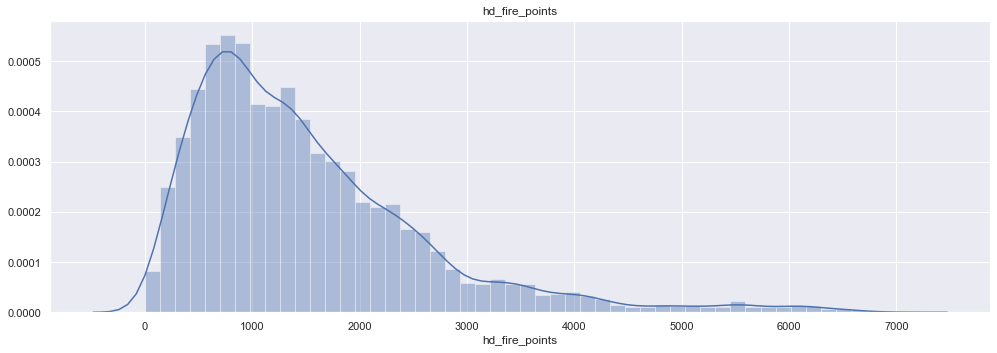

In [28]:
# we don't want to plot the binary/categorical columns
for col in train.select_dtypes('int64').columns:
    d = sns.distplot(train[col])
    d.set_title(col)
    plt.show()

## Correlation Matrix

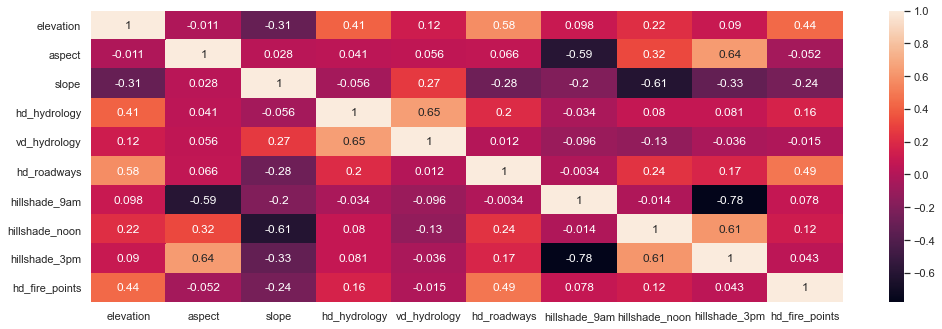

In [29]:
# first look at our correlation plot
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Find the most correlation features

Top Absolute Correlations


hillshade_9am   hillshade_3pm     0.779965
hd_hydrology    vd_hydrology      0.652142
aspect          hillshade_3pm     0.635022
hillshade_noon  hillshade_3pm     0.614526
slope           hillshade_noon    0.612613
aspect          hillshade_9am     0.593997
elevation       hd_roadways       0.578659
dtype: float64

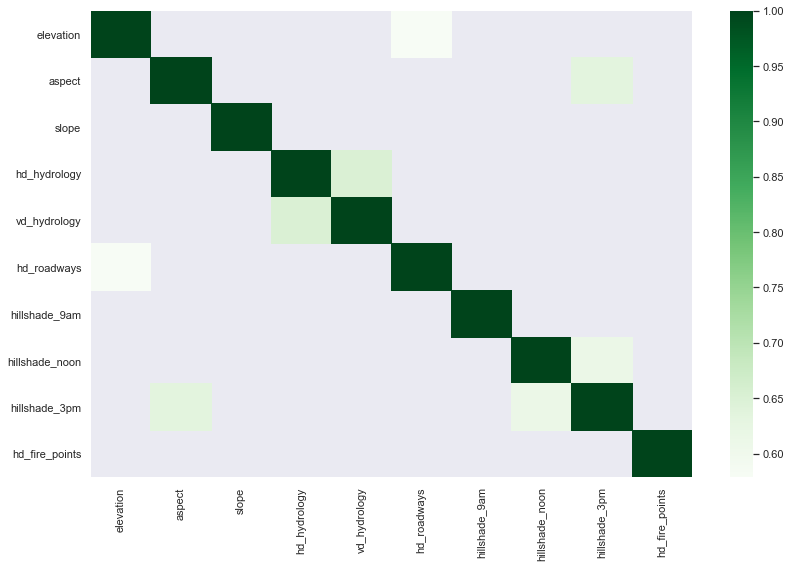

In [30]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def plot_corr(df, corr_threshold = .9):
    corr = df.corr()
    kot = corr[corr>=corr_threshold]
    plt.figure(figsize=(12,8))
    sns.heatmap(kot, cmap="Greens")
    
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    finalcorr = au_corr[0:n]
    plot_corr(df, corr_threshold = finalcorr.min())
    return finalcorr


print("Top Absolute Correlations")
numerical_features = ['elevation', 'aspect', 'slope', 'hd_hydrology', 'vd_hydrology',  
                      'hd_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',  'hd_fire_points']
top_corr = get_top_abs_correlations(train[numerical_features], 7)
top_corr

So our more correlated features are:  
- Hillshade at 9am and Hillshade at 3pm
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Aspect and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon
- Slope and Hillshade at Noon
- Aspect and Hillshade at 9am
- Elevation and Horizontal Distance to Roadways


Lets see those correlated features using scatter plots

In [31]:
train.columns

Index(['elevation', 'aspect', 'slope', 'hd_hydrology', 'vd_hydrology',
       'hd_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'hd_fire_points', 'cover_type', 'wild_areas', 'soil_types'],
      dtype='object')

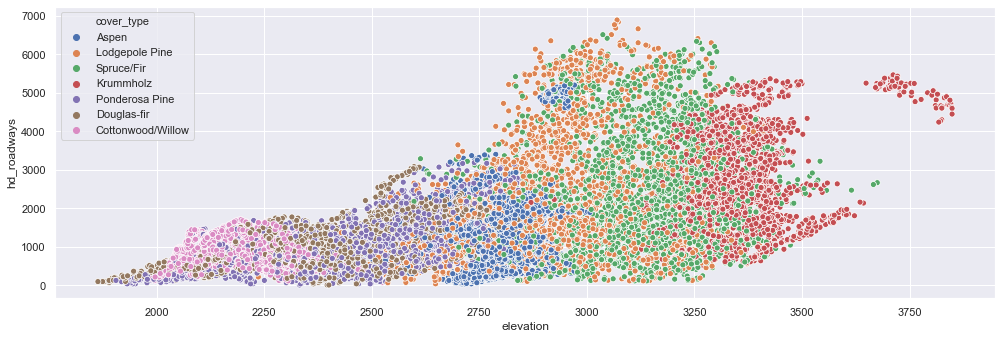

In [40]:
sns.scatterplot(x='elevation', y='hd_roadways', hue='cover_type', data=train)

Positive correlation between Elevation and Distance to Roadways

- Cottonwood trees have the lowest Elevation and distance to roadways compared to other forest covers.
- Douglas trees grow on lower elevated areas but higher than compared to cottonwood trees.
- All Krummholz trees grow on higher elevated areas but we can see a variation in their distance to roadways value.

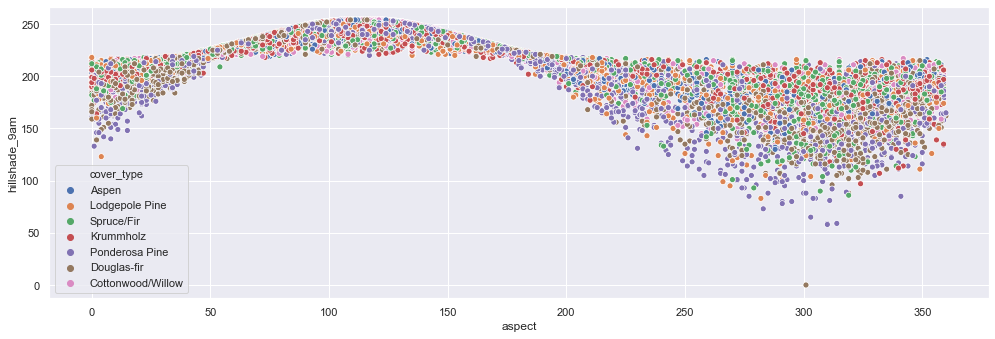

In [41]:
sns.scatterplot(x='aspect', y='hillshade_9am',  hue='cover_type', data=train)

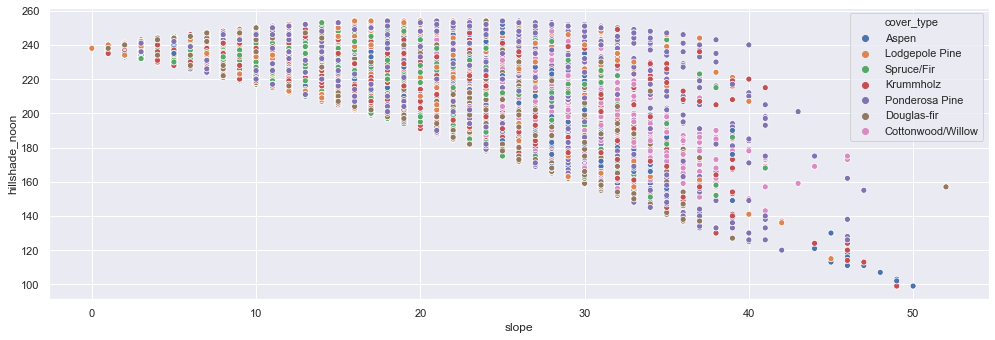

In [44]:
sns.scatterplot(x='slope', y='hillshade_noon', hue='cover_type', data=train)

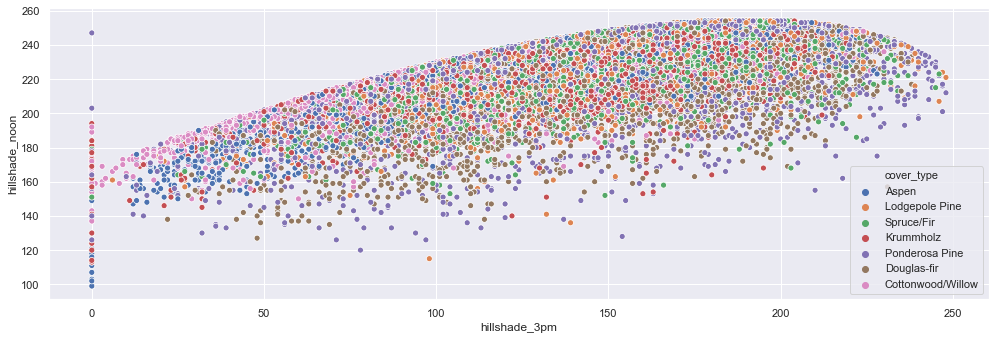

In [43]:
sns.scatterplot(x='hillshade_3pm', y='hillshade_noon', hue='cover_type',data=train)

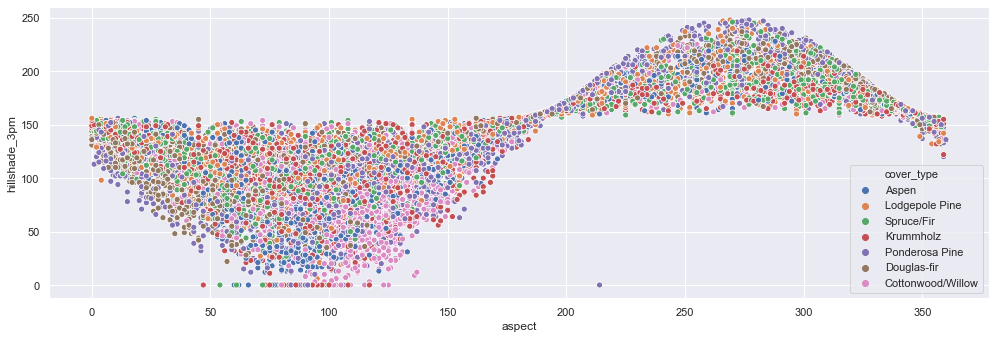

In [42]:
sns.scatterplot(x='aspect', y='hillshade_3pm',  hue='cover_type', data=train)

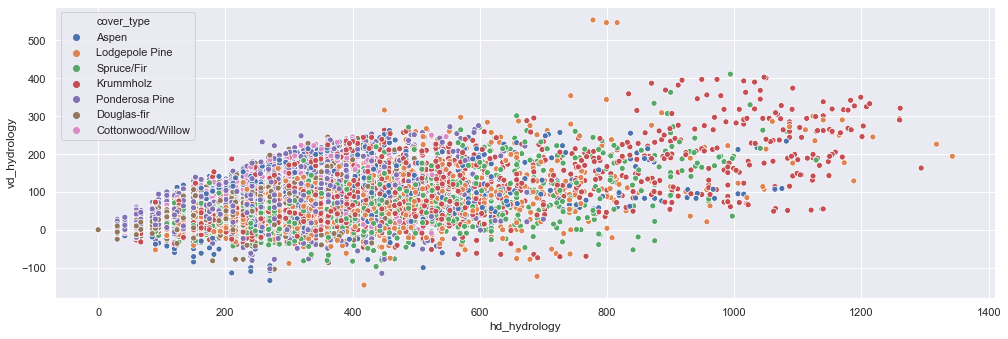

In [45]:
sns.scatterplot(x='hd_hydrology', y='vd_hydrology', hue='cover_type',data=train)

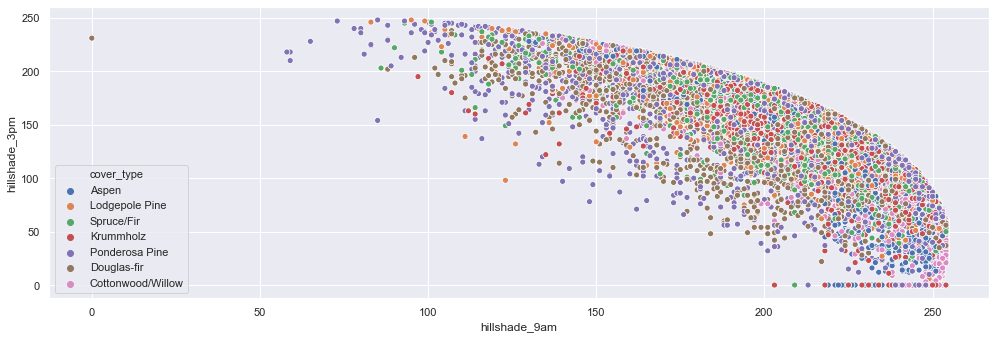

In [46]:
sns.scatterplot(x='hillshade_9am', y='hillshade_3pm', hue='cover_type',data=train)